# Heatmaps and clustering

The data used in this example is from [Xie et al., 2013](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3786220/), 
where they differentiated human H1 stem cells into different lineages. 
The table contains the TPM (transcripts per million) expression values based on RNA-seq data,
mapped to [GENCODE 24](http://www.gencodegenes.org/releases/24.html) using [Kallisto](https://pachterlab.github.io/kallisto/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

sns.set_style('white')

%matplotlib inline

In [2]:
# Change this path to the data on your own computer
path = "/home/simon/git/devcomvis/data/"

df = pd.read_csv(os.path.join(path, "H1_TPM_expression_table.txt.gz"), 
                 compression="gzip",
                 index_col=0,
                 sep="\t",       
           )

In [3]:
df.head()

,GSM915326_H1_neuronal_progenitor,GSM915323_H1_mesenchymal,GSM915325_H1_mesendoderm,GSM915327_H1_neuronal_progenitor,GSM915328_H1,GSM915329_H1,GSM915321_H1_trophoblast,GSM915324_H1_mesendoderm,GSM915322_H1_mesenchymal,GSM915320_H1_trophoblast
gene,,,,,,,,,,
A1BG,0.016987,0.000000,0.000000,0.024759,0.000000,0.000000,0.000000,0.000000,0.000000,0.009636
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.017921,11.484357,0.002171,0.018634,0.023745,0.014277,0.422376,0.000672,11.298700,0.462483
A2ML1,0.000000,0.000000,0.229279,0.017246,0.494638,0.559126,0.115685,0.202110,0.001916,0.000000
A3GALT2,0.067958,0.080563,0.029423,0.067429,0.000000,0.000000,0.026028,0.007797,0.131349,0.030004


Now we create a correlation matrix. 
The `corr()` function will compute the pairwise correlation matrix of all columns in a `DataFrame`.
By default it will use the Pearson correlation matrix. 

In [4]:
corrmat = df.corr()

The correlation matrix can be easily plotted using the Seaborn `heatmap()` function. 
See [the documentation](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html) for more examples.

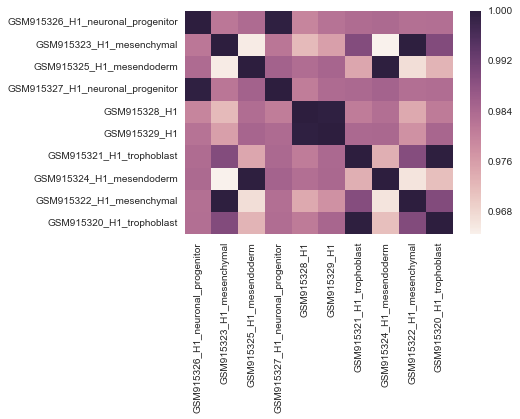

In [5]:
sns.heatmap(corrmat)

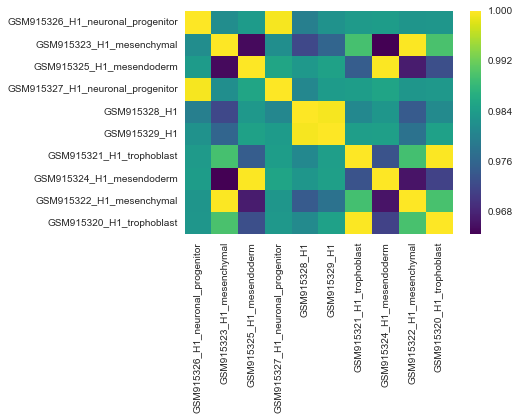

In [6]:
# A different color map (although in this case, I think viridis might not be the best choice)
sns.heatmap(corrmat, cmap="viridis")

Note the scale in the example above. 
In contrast to what the plot looks like at a first glance, the samples all have a high correlation.

**Exercise**: Using the documentation, can you figure out how to set the scale manually?

The `clustermap()` function is a lot like the heatmap function, but it adds a clustering.

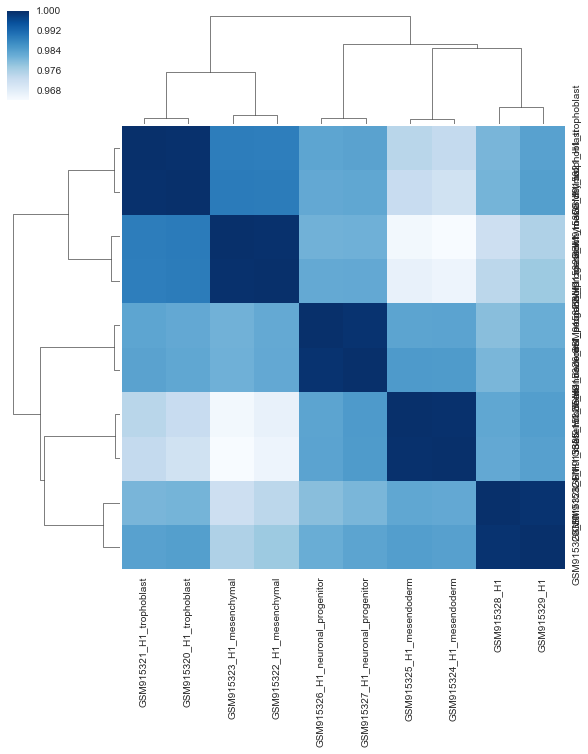

In [7]:
sns.clustermap(corrmat, cmap="Blues")

Let's plot the distribution of all the samples in a boxplot. 
We'll do a log2 transformation first. 

**Exercise**: do you know, or can you figure out what all the diffferent parameters do? 

(0, 4)

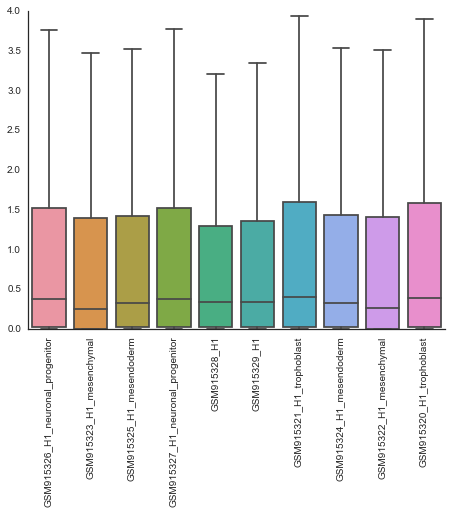

In [8]:
df_log = np.log2(df + 1)
g = sns.factorplot(data=df_log, kind="box", size=5, aspect=1.5, fliersize=0)
g.set_xticklabels(rotation=90)
plt.ylim(0,4)

A very simple normalization method is to center to the mean of the data and subsequently scale to unit variance 
(divide by the standard deviation). 
This implemented in the `scale()` function from the `sklearn` Python module.

In [9]:
from sklearn.preprocessing import scale
df_norm = df_log.apply(scale, 0) # 0 here means apply a function to each column

**Exercise**: plot the boxplots of the normalized data. 
    How does it compare to the previous boxplot?

In [10]:
# Plot boxplots of normalized data

We can also make scatterplots of specific columns.

(0, 16)

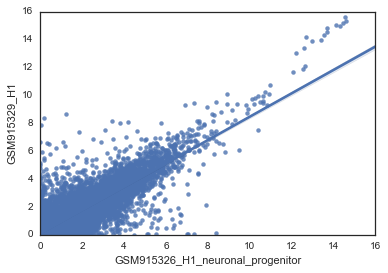

In [11]:
sns.regplot(x="GSM915326_H1_neuronal_progenitor", y="GSM915329_H1", data=df_log)
plt.xlim(0,16)
plt.ylim(0,16)

Or without the regression line.

(0, 12)

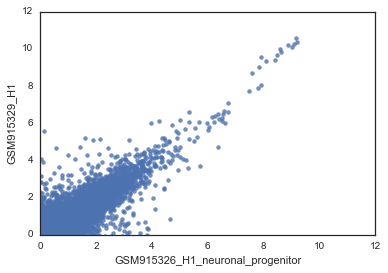

In [12]:
sns.regplot(x="GSM915326_H1_neuronal_progenitor", y="GSM915329_H1", data=df_norm,
           fit_reg=False)
plt.xlim(0,12)
plt.ylim(0,12)

In [13]:
# Select most variable genes
df_var = df_norm[df_norm.std(1) > 1]

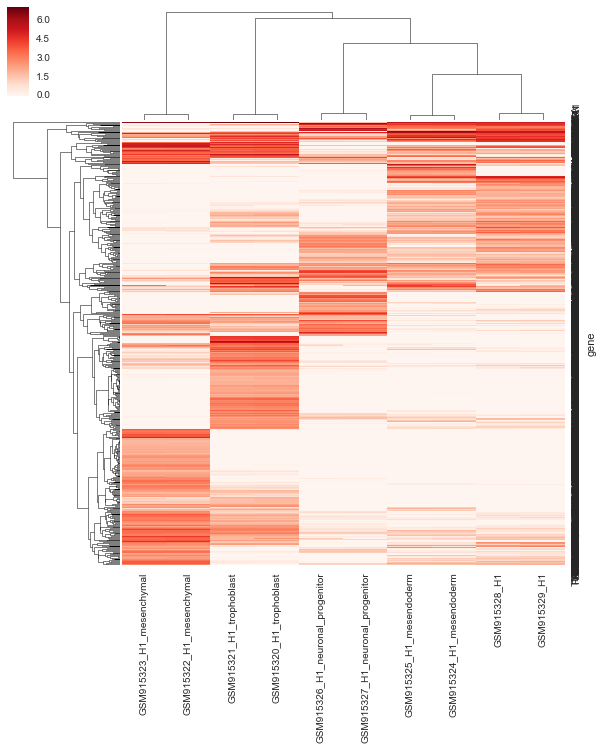

In [14]:
sns.clustermap(df_var, cmap="Reds", vmin=0)

**Exercise** Simplify the data and create one value per condition by taking the mean of two replicates.
See the hints below.

In [15]:
# Create a new, empty DataFrame
tpm = pd.DataFrame()

# Let's print the column names to help us
print df_norm.columns

Index([u'GSM915326_H1_neuronal_progenitor', u'GSM915323_H1_mesenchymal',
       u'GSM915325_H1_mesendoderm', u'GSM915327_H1_neuronal_progenitor',
       u'GSM915328_H1', u'GSM915329_H1', u'GSM915321_H1_trophoblast',
       u'GSM915324_H1_mesendoderm', u'GSM915322_H1_mesenchymal',
       u'GSM915320_H1_trophoblast'],
      dtype='object')


In [16]:
# This will add a new column, which is the mean of two other columns
tpm["H1"] = df[['GSM915328_H1', 'GSM915329_H1']].mean(1)

In [17]:
tpm.head()

,H1
gene,
A1BG,0.000000
A1CF,0.000000
A2M,0.019011
A2ML1,0.526882
A3GALT2,0.000000


**Exercise**: Add the mean expression values of the other conditions.

**Exercise**: Create a DataFrame with the log2 fold change relative to H1 and visualize this in a clustered heatmap. 
    Make a selection of genes (based on what?) to cluster and visualize.